# <span style="color:blue">Creación de portafolios con Python</span>

## <span style="color:green">0. Introducción</span>

Este notebook tiene como objetivo implementar la teoría de Markowitz de creación de carteras a los sets generados durante el curso de Nivel 1 y 2 de Robotdeforex. 
La implementación se ha hecho en Python, aprovechando módulos de importación de datos provenientes de los archivos .htm generados en los backtest. 
El estudio se divide en varias etapas, que se van detallando en los siguientes apartados.

## <span style="color:green">1. Importación de los BT</span>

Las funciones para la importación de los backtest de Metatrader están en la librería pyBTOimportBT. Se debe importar la librería sys de Python para interactuar con el sistema de archivos del Sistema Operativo.

In [1]:
import glob, os
import pyBTOimportBT as pyBT
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plyplot
import math
import cvxopt as opt
from cvxopt import blas, solvers
from matplotlib.pyplot import cm
from datetime import datetime, date, time, timedelta
plyplot.rcParams['figure.figsize']=[100.0,100.0]
from pylab import plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

Primero encontramos los archivos con extensión '.htm' dentro del directorio actual

In [2]:
os.chdir(".")
extension = '*.htm'
files = glob.glob(extension)

Ahora, los importamos con la función import_html_bt de la librería pyBTOimportBT

In [3]:
%time datos = pyBT.import_html_bt(files[0])
capital_inicial = 10000
bt = pyBT.parse_mt4_backtest(datos, capital_inicial)

Wall time: 6.67 s


## <span style="color:green">2. Creación del portafolio</span>

 ### <span style="color:green">2.1. Introducción</span>

En esta sección se presenta la creación de un portafolio con varios backtest realizados en mt4. Primero se eligen unos backtest de modelo para introducir la teoria de optimización de carteras de Markowitz. Después, se sigue el mismo proceso para una cartera determinada de Backtest.

 ### <span style="color:green"> 2.2. Importación de los datos y construcción de la matriz de equidad </span>

Nos cambiamos al directorio **Portfolio**, donde se encuentran los resultados de los backtest realizados con MT4. Leemos los nombres de los directorios y los guardamos en un diccionario, que asigna a cada archivo un nombre de backtest con el formato **BT####**, donde #### es un número secuencial. De esta forma, podremos luego recuperar el/los archivo/s que mejor combinen en un portafolio.

In [4]:
prefix = 'BT'
directorio = 'Portfolio'
extension = '*.htm'
archivos = pyBT.get_filenames(prefix, directorio, extension)

In [5]:
%time backtests = pyBT.parse_several_backtests(archivos)

Wall time: 1min 25s


Se construye la matriz de equidad. Hay que tener en cuenta que las fechas de entrada de los distintos sistemas son diferentes. La matriz resultante tendrá tantas filas como fechas distintas de entrada de los backtests. Al estar el proceso vectorizado en Pandas, es muy rápido.

In [6]:
column = 'P&L'
index = 'DateOpen'
%time results = pyBT.align_backtests(backtests, column, index)

Wall time: 265 ms


In [7]:
correlaciones = results.corr()

In [8]:
idx, idy = np.where((correlaciones <= 0.65) | (correlaciones >= -0.65))

Wall time: 122 ms


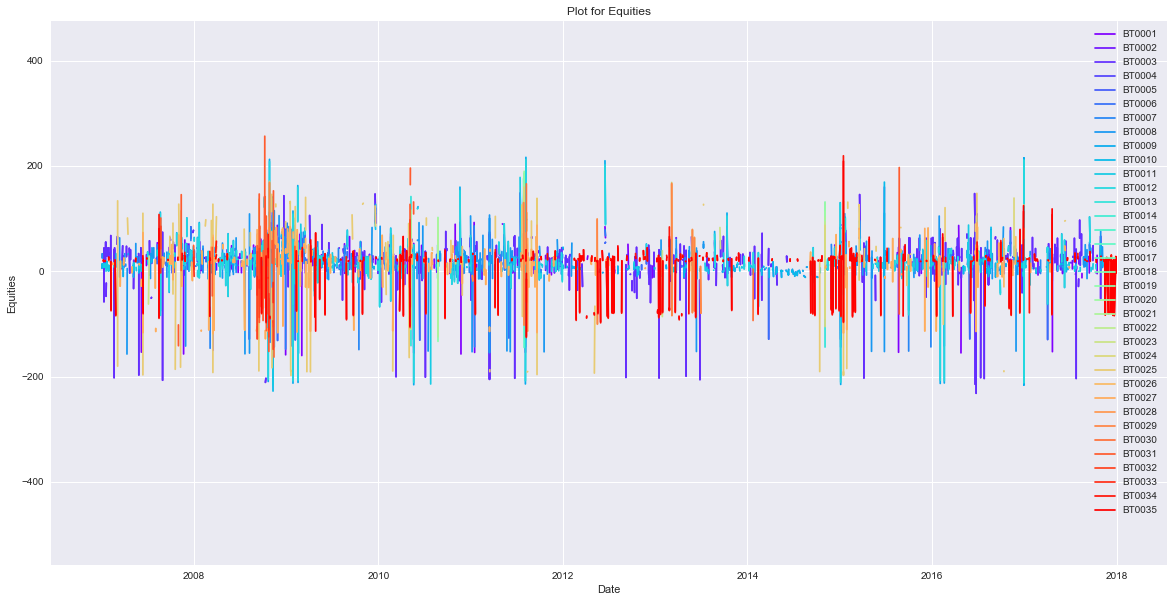

In [9]:
%time pyBT.plot_equity_curves(results, 20, 10, 'Date', 'Equities', 'Plot for Equities')

In [10]:
%time portfolio, optimum_portfolios = pyBT.portfolio_mc(results, 50000)

Wall time: 3.35 s


C:\Users\jjexposi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x000001F555AAD470> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\jjexposi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x000001F555AAD470> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


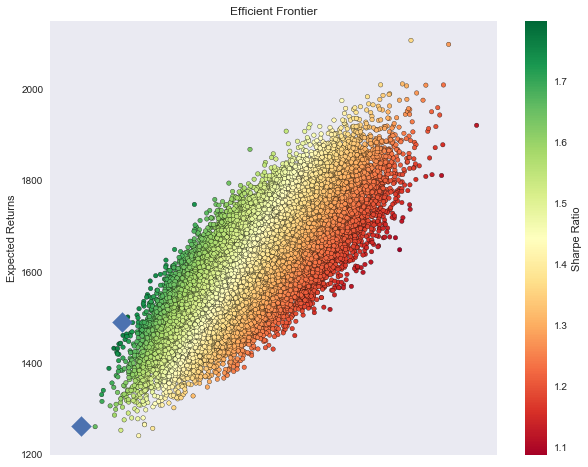

In [11]:
pyBT.draw_portfolios(portfolio, optimum_portfolios)